# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
#Загрузим библиотеки для анализа , визуализации и обучения моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

Загрузим наши датасеты и посмотрим на них.

In [2]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data3 = pd.read_csv('/datasets/geo_data_2.csv')

display(data1.head())
display(data2.head())
display(data3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Данные загруженны , теперь изучим наши датафреймы.

### Исследуем данные

Исследуем data1

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
#Првоерим на кол-во пропусков
data1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [5]:
#Проверим на кол-во явных дубликатов
data1.duplicated().sum()

0

In [6]:
#Проверим на кол-во не явных дубликатов
data1[data1['id'].duplicated()]['id'].value_counts()

bsk9y    1
Tdehs    1
A5aEY    1
QcMuo    1
bxg6G    1
fiKDv    1
AGS9W    1
TtcGQ    1
74z30    1
HZww2    1
Name: id, dtype: int64

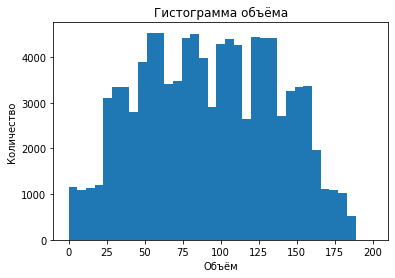

In [7]:
#Построим график объема
plt.title('Гистограмма объёма')
plt.xlabel('Объём')
plt.ylabel('Количество')
plt.hist(x = data1['product'], bins=35, range = (0, 200))
plt.show()

Исследуем data2

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#Првоерим на кол-во пропусков
data2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
#Проверим на кол-во явных дубликатов
data2.duplicated().sum()

0

In [11]:
#Проверим на кол-во не явных дубликатов
data1[data2['id'].duplicated()]['id'].value_counts()

hvrg6    1
RFXea    1
1mHHg    1
ubDZy    1
Name: id, dtype: int64

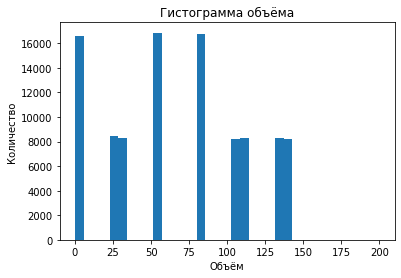

In [12]:
#Построим график объема
plt.title('Гистограмма объёма')
plt.xlabel('Объём')
plt.ylabel('Количество')
plt.hist(x = data2['product'], bins=35, range = (0, 200))
plt.show()

Исследуем data3

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
#Првоерим на кол-во пропусков
data3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
#Проверим на кол-во явных дубликатов
data3.duplicated().sum()

0

In [16]:
#Проверим на кол-во не явных дубликатов
data1[data3['id'].duplicated()]['id'].value_counts()

tmiKi    1
mPBNw    1
15KPx    1
U9TtX    1
Name: id, dtype: int64

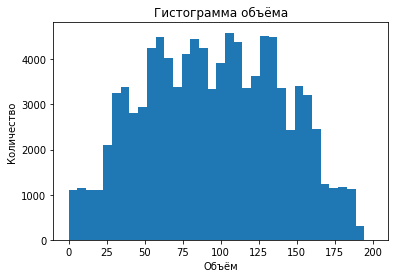

In [17]:
#Построим график объема
plt.title('Гистограмма объёма')
plt.xlabel('Объём')
plt.ylabel('Количество')
plt.hist(x = data3['product'], bins=35, range = (0, 200))
plt.show()

### Константы

In [18]:
# Бюджет на разработку скважин в регионе — 10 млрд рублей
MONEY = int(10e9)
# Доход с каждой единицы продукта составляет 450 тыс. рублей
REVENEU = 450000
# Количество скважин для разработки в регионе
COUNT = 200
# Фиксируем случайное состояние
RANDOM_STATE = np.random.RandomState(12345)

### Вывод

Пропусков нет, явных дупликатов нет, типы данных указанны верно.  
Из графика распределения объёма по второй таблице видно, что пустый скважины , возможно добыча нефти в них прекратилась , так же есть заполненые.

## Обучение и проверка модели

In [19]:
#Удалим столбец 'id' из каждого датафрейма , он нам не понадобиться при обучении модели
df1 = data1.drop(['id'], axis=1)
df2 = data2.drop(['id'], axis=1)
df3 = data3.drop(['id'], axis=1)

In [20]:
#Обучим моедль на линейной регрессии, разделим данную на выборку 
def train_split_test(data):
 
    features = data.drop("product", axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    model = LinearRegression(normalize=False)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    avg_prod = sum(predictions) / len(predictions)
    
    print('RMSE:', rmse.round(3))
    print('Avg product:', avg_prod)
    
    return (predictions, target_valid.reset_index(drop=True), rmse, avg_prod)

In [21]:
predictions_1, target_1, rmse_1, avg_1 = train_split_test(df1)
predictions_2, target_2, rmse_2, avg_2 = train_split_test(df2)
predictions_3, target_3, rmse_3, avg_3 = train_split_test(df3)

RMSE: 37.579
Avg product: 92.59256778438008
RMSE: 0.893
Avg product: 68.72854689544582
RMSE: 40.03
Avg product: 94.96504596800509


### Вывод

В 3 регионе RMSE и AVG выше , чем в остальных.

## Подготовка к расчёту прибыли

In [22]:
profit = MONEY/COUNT/REVENEU
print('Достаточный объём сырья для безубыточной разработки новой скважины.', profit)


Достаточный объём сырья для безубыточной разработки новой скважины. 111.11111111111111


### Вывод

Средний объем наших скважин меньше , чем для безубыточной скважины.

## Расчёт прибыли и рисков 

Напишем функцию для подсчёта ппибыли и рисков 

In [23]:
def revenue(target, probabilities, count):
    # Скважины с максимальным предсказанием
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return REVENEU * selected.sum() - MONEY

In [24]:
region = ['Первый регион', 'Второй регион', 'Третий регион']
def risk_func(tgt, pred, num):
    value = []
    for j in range(1000):
        target_subsample = tgt.sample(n = 500, replace = True, random_state =  RANDOM_STATE)
        probs_subsample = pred.loc[target_subsample.index]

        value.append(revenue(target_subsample, probs_subsample, COUNT))

    value = pd.Series(value)
    lower = value.quantile(0.025)
    upper = value.quantile(0.975)
    risk = value[value < 0].count()/value.count()*100
    mean = value.mean()
    print(region[num])
    print("Средняя выручка:", round(mean/10 ** 6, 2), 'млн.руб')
    print("Доверительный интервал от:", round(lower/10 ** 6, 2),'млн.руб.', 'до:', round(upper/10 ** 6, 2),'млн.руб')
    print("Риск:", round(risk, 2), '%')


In [25]:
risk_func(target_1, predictions_1, 0)

Первый регион
Средняя выручка: 425.94 млн.руб
Доверительный интервал от: -102.09 млн.руб. до: 947.98 млн.руб
Риск: 6.0 %


In [26]:
risk_func(target_2, predictions_2, 1)

Второй регион
Средняя выручка: 518.26 млн.руб
Доверительный интервал от: 128.12 млн.руб. до: 953.61 млн.руб
Риск: 0.3 %


In [27]:
risk_func(target_3, predictions_3, 2)

Третий регион
Средняя выручка: 420.19 млн.руб
Доверительный интервал от: -115.85 млн.руб. до: 989.63 млн.руб
Риск: 6.2 %


### Вывод

Самая высокая средняя выручка во 2 регионе.    
Самый низкий риск убытка у второго региона - 0.3%.    
В третьем регионе самая низкая вырочка , а так же самый высокий риск.  

### Итоговый вывод.

В третьем регионе средний запас сырья и RMSE выше, чем в остальных.  
Средний объём скважен в регионах меньше, чем объём для безубыточности.  
Самая высокая средняя выручка во 2 регионе.      
Самый низкий риск убытка у второго региона - 0.3%.      
В третьем регионе самая низкая вырочка , а так же самый высокий риск.    
Регион для разработки месторождения - второй регион.  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован